Exercice base sur un kernel de https://www.kaggle.com/shivamb 

# <a> Semaine 10 les reseaux de neurone </a>

<br>

![](https://www.pangeanic.com/wp-content/uploads/sites/2/2017/07/neural-network-graph-624x492.jpg)

I would like to thank Andrew NG and deeplearning.ai course for their excellent material

## Data Set

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

## Neural network Cheatsheet 
Qui a le temps de re-regarder les videos a la recherche de formules ;)

#### C. Forward Propagation 

Neural Network model goes through the process called forward propagation in which it passes the computed activation outputs in the forward direction. 

Z = W*X + b   
A = g(Z) 

- g is the activation function 
- A is the activation using the input 
- W is the weight associated with the input 
- B is the bias associated with the node 

#### D. Error Computation: 

The neural network learns by improving the values of weights and bias. The model computes the error in the predicted output in the final layer which is then used to make small adjustments the weights and bias. The adjustments are made such that the total error is minimized. Loss function measures the error in the final layer and cost function measures the total error of the network. 

Loss = Actual_Value - Predicted_Value   

Cost = Summation (Loss)   


## <a> 2. Implement a Neural Network - Binary Classification</a>  

Lets implement a basic neural network in python for binary classification which is used to classify if a given image is 0 or 1.  

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# import tqdm as tqdm


### 2.1 Dataset Preparation

First step is to load and prepare the dataset

In [2]:
# train = pd.read_csv("src/train.csv")

# # include only the rows having label = 0 or 1 (binary classification)
# X = train[train['label'].isin([0, 1])]


# # target variable
# Y = train[train['label'].isin([0, 1])]['label']

# Y = Y[:,np.newaxis]
# Y = Y.T

# # remove the label from X
# X = X.drop(['label'], axis = 1)
# X = X.T

In [3]:
train = pd.read_csv("src/train.csv")

# include only the rows having label = 0 or 1 (binary classification)
# X = train[train['label'].isin([0, 1])]
train['label'].loc[train['label'] != 1] = 0
X = train       


# target variable
# Y = train[train['label'].isin([0, 1])]['label']



Y = train['label']

Y = Y[:,np.newaxis]
Y = Y.T

# remove the label from X
X = X.drop(['label'], axis = 1)
X = X.T

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,41990,41991,41992,41993,41994,41995,41996,41997,41998,41999
pixel0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pixel4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


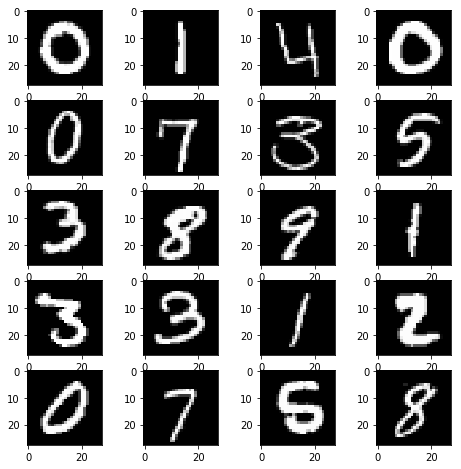

In [5]:
# On va afficher quelques exemples des images sur lesquelles nous allons travailler
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    X1 = X.T.iloc[i]
    X1 = X1.values.reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(X1, cmap='gray')
plt.show()

### Resultats

Les resultats devraient etre pour X et Y devraient etre deux matrices de dimensions respectives

X (784, 8816)
Y (1, 8816)

784 etant le nombre d'input features (des pixels allant de 0 a 255 en intensité lumineuse) et 8816 le nombre de training examples. <br>
On retrouve ici les matrices en colones plutot qu'en ligne

In [6]:
print("X", X.shape)
print("Y", Y.shape)


X (784, 42000)
Y (1, 42000)


### 2.2 Implementing a Activation Function 

We will use sigmoid activation function because it outputs the values between 0 and 1 so its a good choice for a binary classification problem

In [7]:
# implementing a sigmoid activation function
def sigmoid(x, derivative=False):
    if(derivative == True):
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.exp(-x))

### Resultats

On peut verifier son resultat avec les valeurs connues de la fontion sigmoid comme : <br>
sigmoid(0) = 0.5 <br>
sigmoid(0, derivative = False) = 0.25 <br>


In [8]:
print(sigmoid(0))
print(sigmoid(0, derivative = True))

0.5
0.25


### 2.3 Define Neural Network Architecture

Create a model with three layers - Input, Hidden, Output.

Nous voulons creer ici une architecture pour notre reseau de neurone : combien de layers ? d'units pour chaque layer ect ... <br>
<br>
Nous commencerons par un reseau a 2 layers : 1 input layer, 1 hidden layer et 1 output layer : <br>
 - Un input de 784 (le nombre de feature pour chaque image) <br>
 - 10 unité dans le hidden layer <br>
 - Seulement une uniteé dans l'output layer qui vaudra zero si notre image represente un 0 et ... 1 si c'est un 1 !

In [9]:
def network_architecture(X, Y):
    # nodes in input layer
    n_x = X.shape[0]
    # nodes in hidden layer
    n_h = 10         
    # nodes in output layer
    n_y = 1
    return (n_x, n_h, n_y)

n_x, n_h, n_y = network_architecture(X, Y)
print ("n_x", n_x)
print ("n_h", n_h)
print ("n_y", n_y)

n_x 784
n_h 10
n_y 1


### 2.4 Define Neural Network Parameters 

Neural Network parameters are weights and bias which we need to initialze with zero values. The first layer only contains inputs so there are no weights and bias, but the hidden layer and the output layer have a weight and bias term. (W1, b1 and W2, b2) <br> <br>

Afin d'initializer aleatoirement nos poids on va utiliser une fonction de numpy qui return une matrice de dimension de notr choix avec des issues d'une distribution normale que l'on mettra a l'echelle 0.01

In [10]:
def define_network_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01 # random initialization
    b1 = np.zeros((n_h, 1)) # zero initialization
    W2 = np.random.randn(n_y,n_h) * 0.01 
    b2 = np.zeros((n_y, 1)) 

    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

params = define_network_parameters(n_x, n_h, n_y)
print("w1", params['W1'].shape)
print("b1", params['b1'].shape)
print("w2", params['W2'].shape)
print("b2", params['b2'].shape)

w1 (10, 784)
b1 (10, 1)
w2 (1, 10)
b2 (1, 1)


Et puis ca ne fait jamais de mal de visualiser de temps en temps ;)

In [11]:
n_x, n_h, n_y = network_architecture(X, Y)

params = define_network_parameters(n_x, n_h, n_y)

print(n_x, n_h, n_y)
print(params['W1'])
print(params['W2'])
print(params['b1'])

784 10 1
[[-3.23767698e-03  1.00100204e-02 -8.92878041e-03 ... -2.86992412e-03
   1.39969451e-02  6.76154569e-03]
 [ 4.40705440e-03 -3.08004451e-05  1.40260457e-02 ...  6.11875220e-03
   6.13521681e-03 -2.61496146e-03]
 [ 4.49699382e-03 -1.09718152e-02  9.35305606e-03 ... -2.55128184e-03
   3.53811042e-04 -1.38978674e-02]
 ...
 [ 9.96665052e-03  1.52962257e-03 -2.79058598e-03 ...  1.37604058e-02
  -2.34650883e-03 -1.37537065e-02]
 [-3.96965694e-03 -2.17804158e-02 -1.87502598e-03 ... -1.15124300e-02
   2.72592846e-02  5.57863428e-03]
 [-3.95893756e-03  3.67390257e-03 -5.49746431e-03 ...  3.89295136e-04
   1.85294026e-02  4.77424016e-03]]
[[ 0.00413157 -0.00779774 -0.00057284  0.00022055  0.00921184 -0.01351408
   0.00543578 -0.00237357 -0.00024675 -0.00163618]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### 2.5 Implement Forward Propagation

The hidden layer and output layer will compute the activations using sigmoid activation function and will pass it in the forward direction. While computing this activation, the input is multiplied with weight and added with bias before passing it to the function. 

In [12]:
def forward_propagation(X, params):
    Z1 = np.dot(params['W1'], X) + params['b1']
    A1 = sigmoid(Z1)

    Z2 = np.dot(params['W2'], A1) + params['b2']
    A2 = sigmoid(Z2)
    
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

### Resultats

On peut au moins verifier la forme des matrices calculées : <br>
Z1  (10, 8816)<br>
A1  (10, 8816)<br>
Z2  (1, 8816) <br>
A2  (1, 8816) <br>

In [13]:
refor = forward_propagation(X, params)

print("Z1", refor['Z1'].shape)
print("A1", refor['A1'].shape)
print("Z2", refor['Z2'].shape)
print("A2", refor['A2'].shape)

Z1 (10, 42000)
A1 (10, 42000)
Z2 (1, 42000)
A2 (1, 42000)


### 2.6 Compute the Network Error 

To compute the cost, one straight forward approach is to compute the absolute error among prediction and actual value. But a better loss function is the log loss function which is defines as : 

  -Summ ( Log (Pred) * Actual + Log (1 - Pred ) * Actual ) / m

In [14]:
# def compute_error(Predicted, Actual):
#     logprobs = np.multiply(np.log(Predicted), Actual)+ np.multiply(np.log(1-Predicted), 1-Actual)
#     cost = -np.sum(logprobs) / Actual.shape[1] 
#     return np.squeeze(cost)

def compute_error(Predicted, Actual):
    return ((1/(2 * Predicted.shape[1])) * (np.sum((Predicted - Actual)**2)))
    #-Summ ( Log (Pred) * Actual + Log (1 - Pred ) * Actual ) / m
    #return J

### 2.7 Implement Backward Propagation

In backward propagation function, the error is passed backward to previous layers and the derivatives of weights and bias are computed. The weights and bias are then updated using the derivatives.  

In [15]:
def backward_propagation(params, activations, X, Y):
    m = X.shape[1]
    
    # output layer
    dZ2 = activations['A2'] - Y # compute the error derivative 
    dW2 = np.dot(dZ2, activations['A1'].T) / m # compute the weight derivative 
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m # compute the bias derivative
    
    
    # hidden layer
    dZ1 = np.dot(params['W2'].T, dZ2) * sigmoid(activations['Z1'], derivative=True)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1,keepdims=True) / m
    
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(params, derivatives, alpha = 0.1):
    # alpha is the model's learning rate 
    
    params['W1'] = params['W1'] - alpha * derivatives['dW1']
    params['b1'] = params['b1'] - alpha * derivatives['db1']
    params['W2'] = params['W2'] - alpha * derivatives['dW2']
    params['b2'] = params['b2'] - alpha * derivatives['db2']
    return params

Encore une fois la meilleure verification consiste a verifier ses dimensions et a jeter un oeuil a son resultat :)

In [16]:
params = update_parameters(params, backward_propagation(params, refor, X, Y))
# print(params)

### 2.8 Compile and Train the Model

Create a function which compiles all the key functions and creates a neural network model.

Maintenant que l'on a poser une a une les pierres de notre algorythme il est temps de prendre un peu de recul pour verifier que tout s'articule et fonctionne de maniere harmonieuse : <br>
 - Il faut definir l'architecture de notre reseau
 - initialiser nos parametres
 - puis pour un nombre donné d'époches on fait une prediction de resultat puis on affine nos parametres (gradient descent) ... notre algorythme "apprend"

In [17]:
def neural_network(X, Y, num_iterations = 10):
    n_x, n_h, n_y = network_architecture(X, Y) #on definit l'architecture de notre reseau
    np.random.seed(42)
    params = define_network_parameters(n_x, n_h, n_y) #on en profite pour initialiser aleatoirement nos parametres
    cost = []
    for i in range(0, num_iterations):
        activations = forward_propagation(X, params)
        cost.append(compute_error(activations['A2'], Y))
    
        derivatives = backward_propagation(params, activations, X, Y) 
        params = update_parameters(params, derivatives)
    return params, cost

On se lance maintenant !

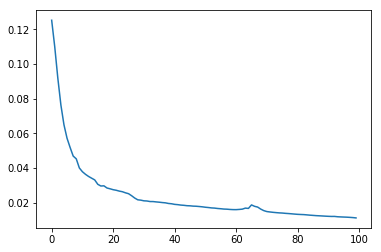

In [18]:

model, cost = neural_network(X, Y, num_iterations = 100)
ax = plt.axes()
ax.plot(cost)

### 2.9 Predictions 

La fonction predict va nous permettre a partir de nos parametres fraichement affinés de formuler avec une n-ième forward-propagation la fiabilité de nos predictions sur notre training set

In [19]:
def predict(parameters, X):
    results = forward_propagation(X, parameters)
    print (results['A2'][0])
    predictions = np.around(results['A2'])    
    return predictions

predictions = predict(model, X)
# print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

[0.60089145 0.01927972 0.60089145 ... 0.01927972 0.01927972 0.01927972]


In [20]:
#Error va contenir l'index (sur nos 8860 training examples) des exemples ou notre algorythme s'est trompé

Error = []
for i in range(Y.shape[1]):
    if (round(Y[0][i], 0) != predictions[0][i]):
        Error.append(i)
print(Error)
        
print ('Accuracy: %f' % float((float(X.shape[0]) - float(len(Error))) / float(X.shape[0]) * 100) + '%')  

[60, 61, 135, 191, 218, 622, 724, 897, 1147, 1287, 1365, 1416, 1635, 1696, 1772, 1783, 1979, 2284, 3041, 3543, 3585, 3783, 3846, 4403, 4605, 4741, 4789, 4928, 4948, 4950, 5149, 5349, 5373, 5381, 5427, 5606, 5665, 5843, 6220, 6223, 6306, 6500, 6515, 6625, 6669, 6682, 6693, 6861, 7173, 7216, 7242, 7244, 7362, 7389, 7525, 7600, 7620, 7759, 8050, 8139, 8147, 8413, 8631, 8900, 9014, 9104, 9210, 9612, 9741, 9835, 10116, 10195, 10250, 10353, 10968, 10984, 11246, 11314, 11326, 11472, 11740, 11811, 11909, 11947, 12198, 12257, 12468, 12580, 12690, 13103, 13105, 13222, 13226, 13243, 13414, 13477, 13513, 13519, 13682, 13852, 13914, 13929, 14115, 14168, 14416, 14513, 14569, 14570, 14715, 14941, 14953, 14995, 15008, 15085, 15814, 15833, 15995, 16139, 16179, 16403, 16532, 16651, 16680, 17428, 17650, 17651, 17743, 17763, 17858, 17989, 18064, 18166, 18475, 18756, 18767, 18769, 18819, 18943, 18989, 19015, 19162, 19377, 19633, 19705, 19977, 19979, 20137, 20304, 20528, 21006, 21021, 21125, 21310, 21553, 2

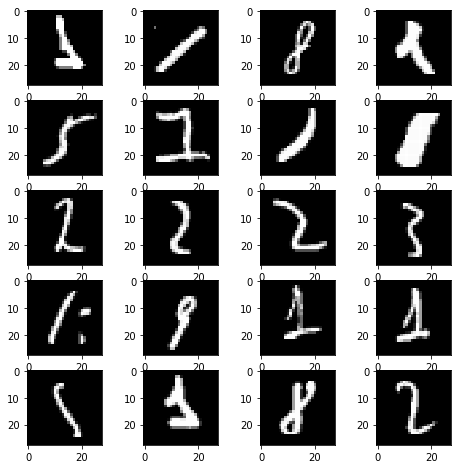

In [21]:

fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, (columns * rows) + 1):
    
    X1 = X.T.iloc[Error[i-1]]
    X1 = X1.values.reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(X1, cmap='gray')
plt.show()